## Importing Libraries

In [1]:
## Remove Warnings ## 
import warnings
warnings.filterwarnings("ignore")

## Data ## 
import pandas as pd
import numpy as np

## Country Code ## 
import country_converter as coco
import pycountry_convert as pc

## Visualization ## 
import matplotlib.pyplot as plt 
import seaborn as sns 
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling ## 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Gathering Data

In [2]:
from zipfile import ZipFile

with ZipFile("data/data-science-salaries-2023.zip", "r") as zObject:
    zObject.extractall(path="data/")

In [109]:
df_salaries = pd.read_csv("data/ds_salaries.csv")

In [110]:
df= df_salaries

## Data Exploration

In [111]:
df_salaries.head(35)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [112]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [113]:
df_salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


## Salary in USD

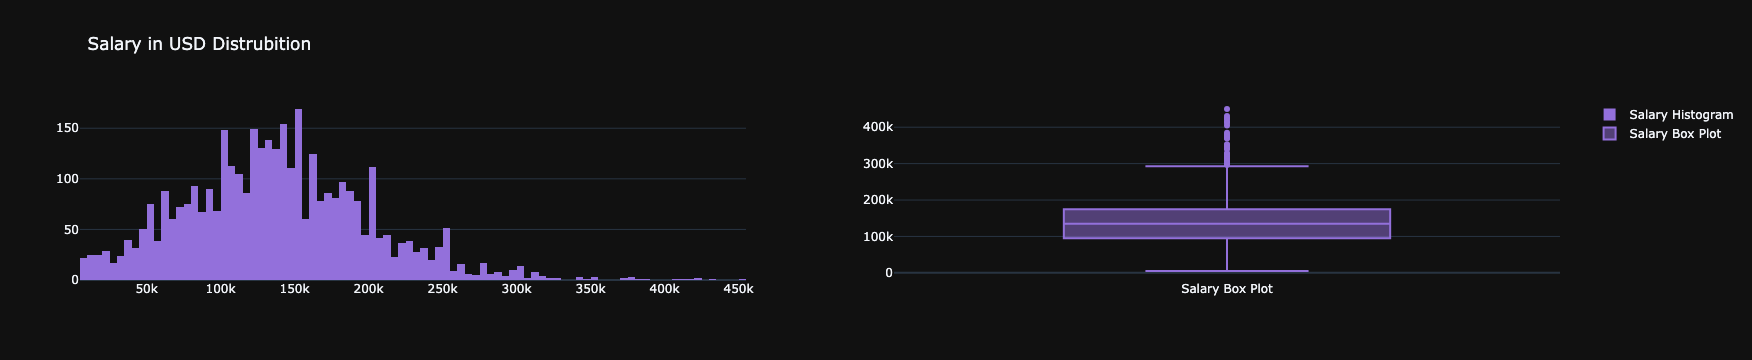

In [114]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=df_salaries["salary_in_usd"], name = "Salary Histogram", marker_color = "MediumPurple"),
              row = 1, col=1)

fig.add_trace(go.Box(y=df_salaries["salary_in_usd"], name = "Salary Box Plot", marker_color = "MediumPurple"),
              row = 1, col=2)

fig.update_layout(title_text = "Salary in USD Distrubition", template ="plotly_dark")

fig.show()

In [115]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))].index.tolist()
    
    print(outliers)
    print("Number of Outliers: ", len(outliers))

In [116]:
find_outliers_IQR(df_salaries["salary_in_usd"])

[33, 68, 83, 133, 145, 163, 190, 228, 358, 478, 482, 488, 528, 649, 687, 716, 793, 845, 860, 1007, 1097, 1099, 1105, 1116, 1131, 1153, 1258, 1286, 1288, 1311, 1396, 1421, 1427, 1458, 1558, 1593, 1605, 1675, 1677, 1722, 1932, 2011, 2162, 2279, 2281, 2331, 2359, 2374, 2406, 2502, 2555, 2670, 2832, 2856, 3152, 3410, 3463, 3468, 3522, 3675, 3697, 3747, 3750]
Number of Outliers:  63


In [117]:
salary_in_usd = df_salaries["salary_in_usd"]
print('Mean Salary in USD: ', salary_in_usd.values.mean())
print('Median Salary in USD: ', np.median(salary_in_usd.values))
print('Minimum Salary in USD: ', salary_in_usd.values.min())
print('Maximum Salary in USD: ', salary_in_usd.values.max())

Mean Salary in USD:  137570.38988015978
Median Salary in USD:  135000.0
Minimum Salary in USD:  5132
Maximum Salary in USD:  450000


## Work Year

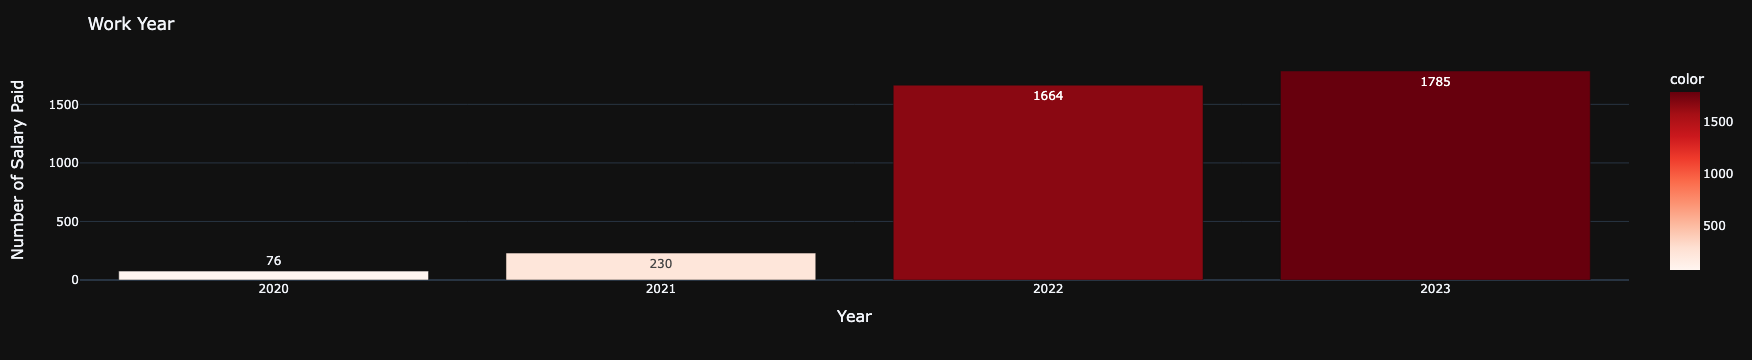

In [118]:
work_year_counts = df_salaries["work_year"].value_counts().sort_index()
fig = px.bar(
            x=work_year_counts.index.astype('str'), 
            y=work_year_counts.values, 
            text=work_year_counts.values,
            color=work_year_counts.values,
            color_continuous_scale='Reds')

fig.update_layout(
    title='Work Year', 
    xaxis=dict(
        title='Year',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Salary Paid',
        titlefont_size=16
    ),
    template='plotly_dark',
)
fig.show()

## Experience Level

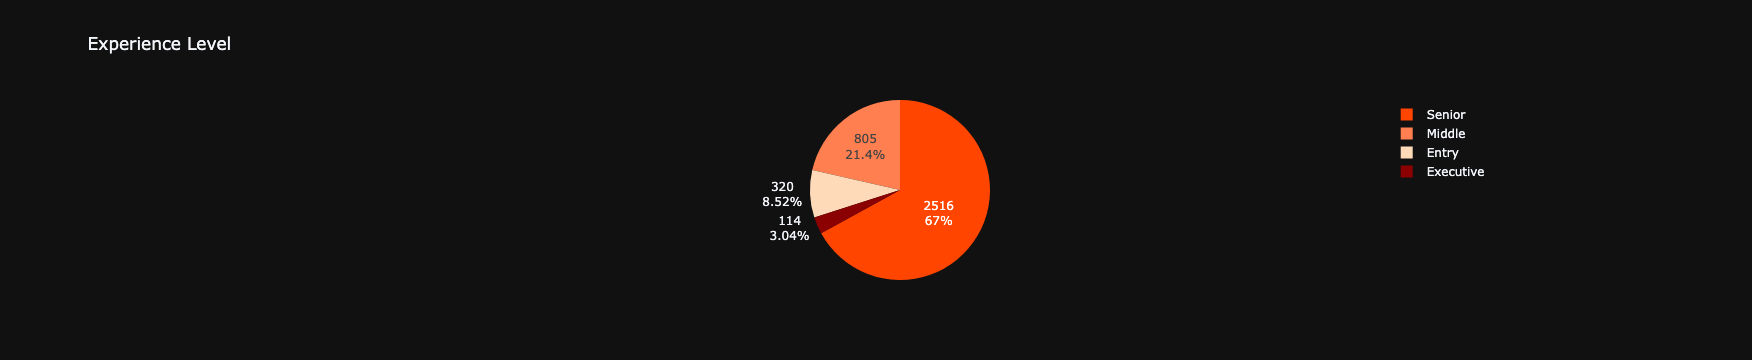

In [119]:
colors=["orangered", "coral", "peachpuff", "darkred"]

experience_level_counts = df_salaries["experience_level"].value_counts()

fig = go.Figure(data=[go.Pie(
            values=experience_level_counts.values, 
            labels=['Senior', 'Middle', 'Entry', 'Executive'], 
            textinfo='percent+value',
            marker_colors=colors)])
fig.update_layout(
    title_text='Experience Level',
    template='plotly_dark'
)
fig.show()

## Employment Type

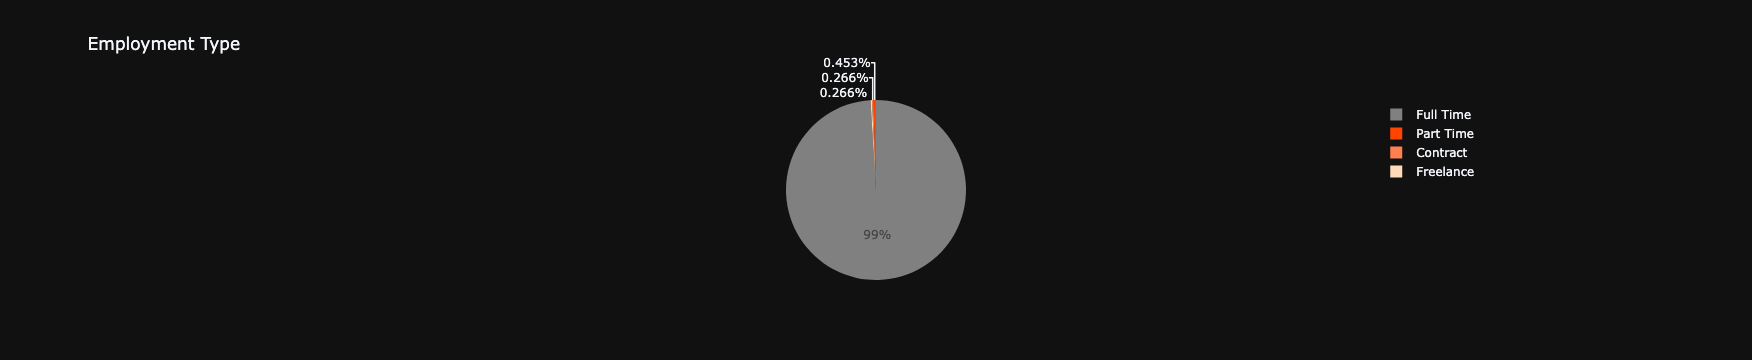

In [120]:
colors=['grey', 'orangered', 'coral', 'peachpuff',]
employment_type_counts = df_salaries['employment_type'].value_counts()

fig = px.pie(df_salaries,
            values=employment_type_counts.values, 
            names=['Full Time', 'Part Time', 'Contract', 'Freelance'], 
            title='Employment Type',
            color_discrete_sequence=colors)
fig.update_layout(
    template='plotly_dark'
)
fig.show()

## Job Title

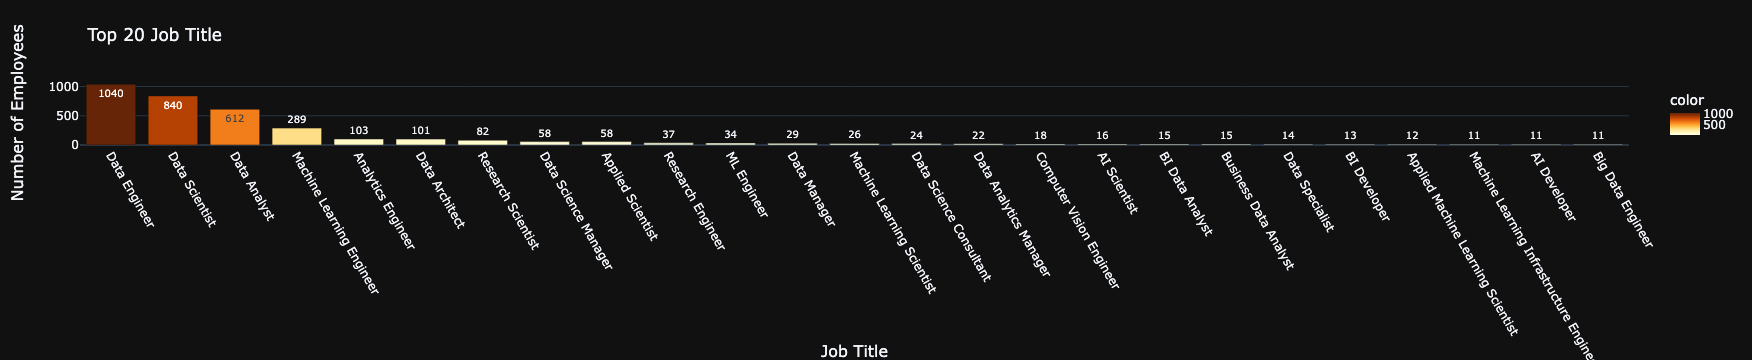

In [121]:
top20_job_title = df_salaries['job_title'].value_counts().sort_values(ascending=False)[:25]
fig = px.bar(df_salaries, 
            x=top20_job_title.index, 
            y=top20_job_title.values, 
            text=top20_job_title.values,
            color=top20_job_title.values,
            color_continuous_scale='YlOrBr',
            title='Top 20 Job Title')
fig.update_layout(
    xaxis=dict(
        title='Job Title',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Employees',
        titlefont_size=16
    ),
    xaxis_tickangle=60,
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=10
)
fig.show()

## Employee Residence

In [122]:
df_salaries['employee_residence'] = coco.convert(df_salaries['employee_residence'], to='ISO3')


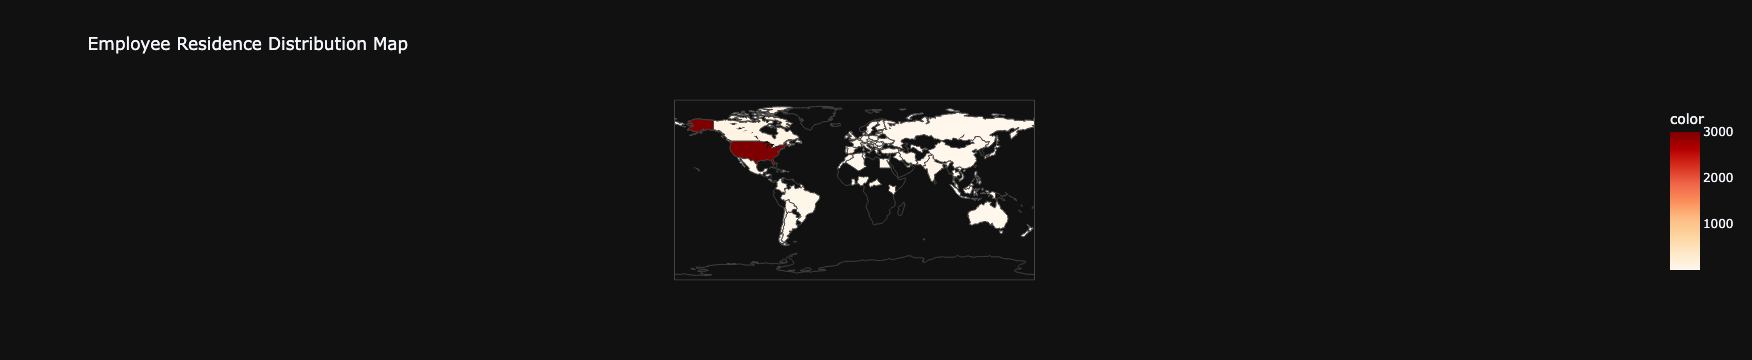

In [123]:
residence = df_salaries['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.OrRd,
                    template='plotly_dark',
                    title='Employee Residence Distribution Map')

fig.show()

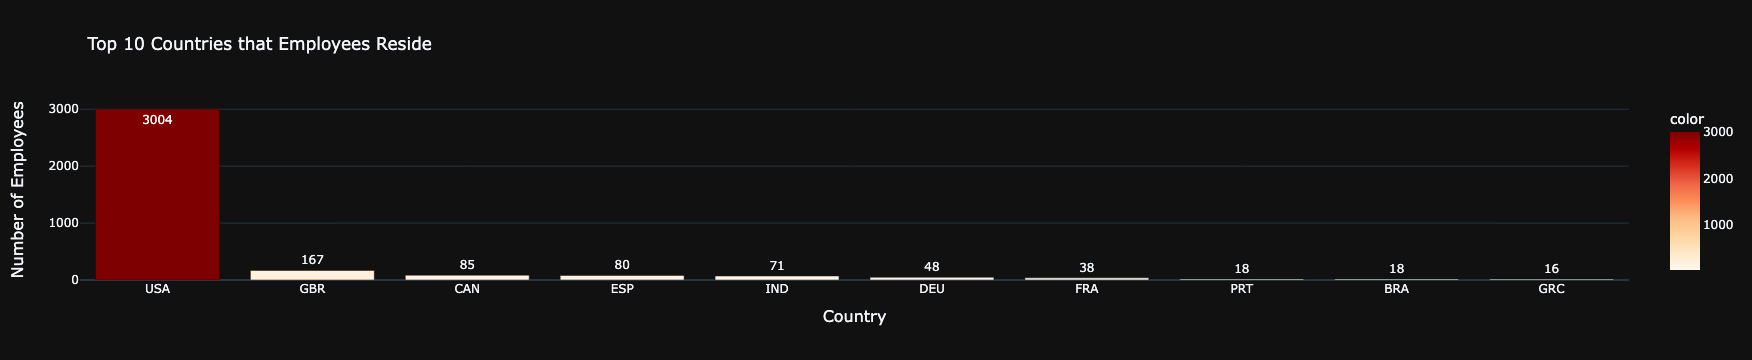

In [124]:
top10_residence= df_salaries['employee_residence'].value_counts().sort_values(ascending=False)[:10]
fig = px.bar(df_salaries, 
            x=top10_residence.index, 
            y=top10_residence.values, 
            text=top10_residence.values,
            color=top10_residence.values,
            color_continuous_scale='OrRd',
            title='Top 10 Countries that Employees Reside')
fig.update_layout(
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Employees',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=12
)
fig.show()

## Remote Ratio

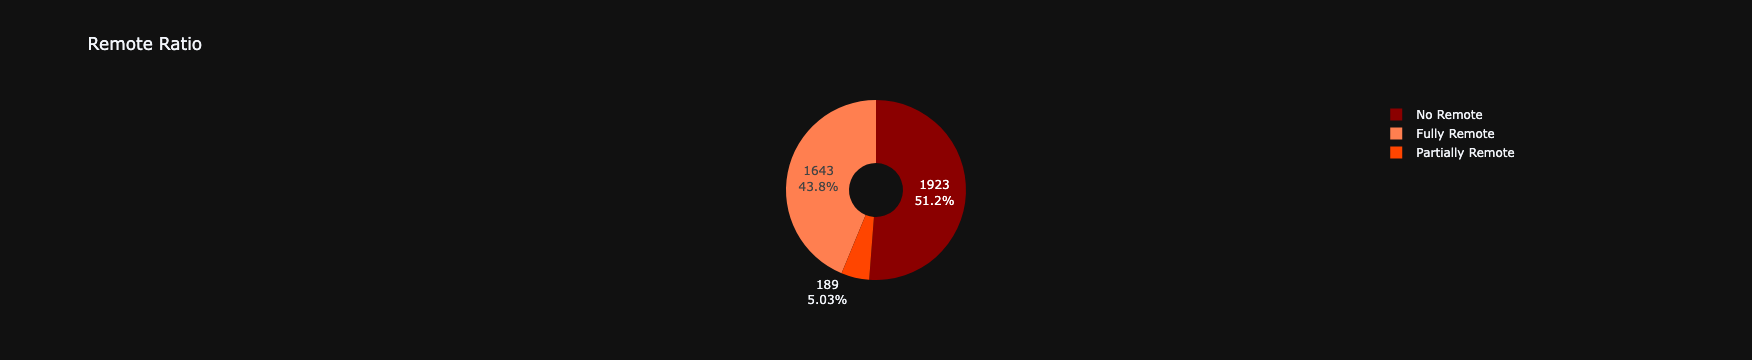

In [125]:
remote_ratio_counts = df_salaries['remote_ratio'].value_counts()
colors=['darkred', 'coral', 'orangered']

fig = go.Figure(data=[go.Pie(labels=['No Remote', 'Fully Remote', 'Partially Remote'],
                             values=remote_ratio_counts.values,
                             hole=.3,
                             textinfo='percent+value',
                             marker_colors=colors)])
fig.update_layout(
    title_text='Remote Ratio',
    template='plotly_dark'
)
fig.show()

## Company Location 

In [126]:
df_salaries['company_location'] = coco.convert(df_salaries['company_location'], to='ISO3')


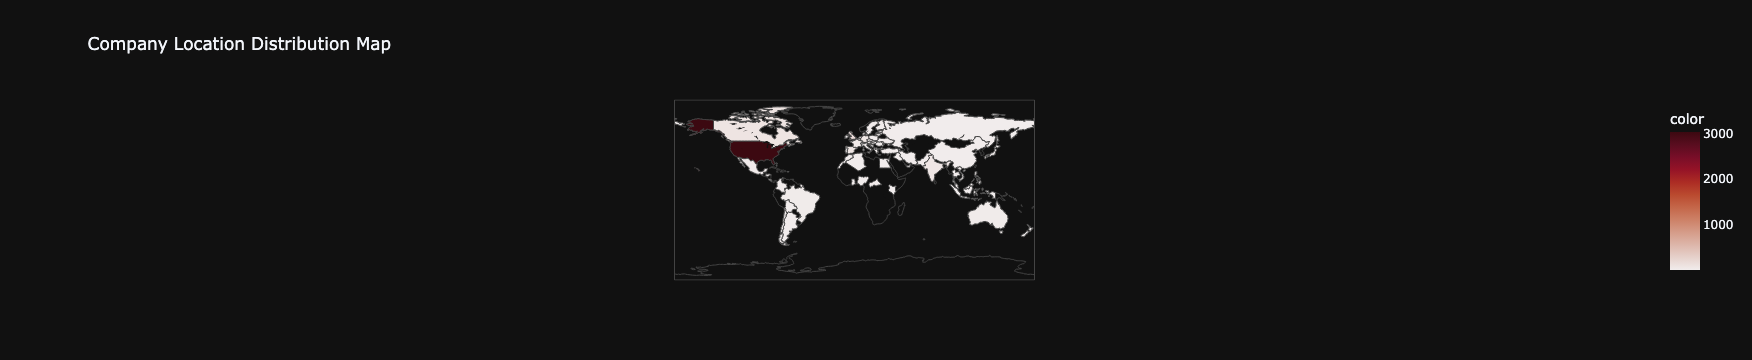

In [127]:
company_location = df_salaries['company_location'].value_counts()
fig = px.choropleth(locations=company_location.index,
                    color=company_location.values,
                    color_continuous_scale=px.colors.sequential.amp,
                    template='plotly_dark',
                    title='Company Location Distribution Map')

fig.show()

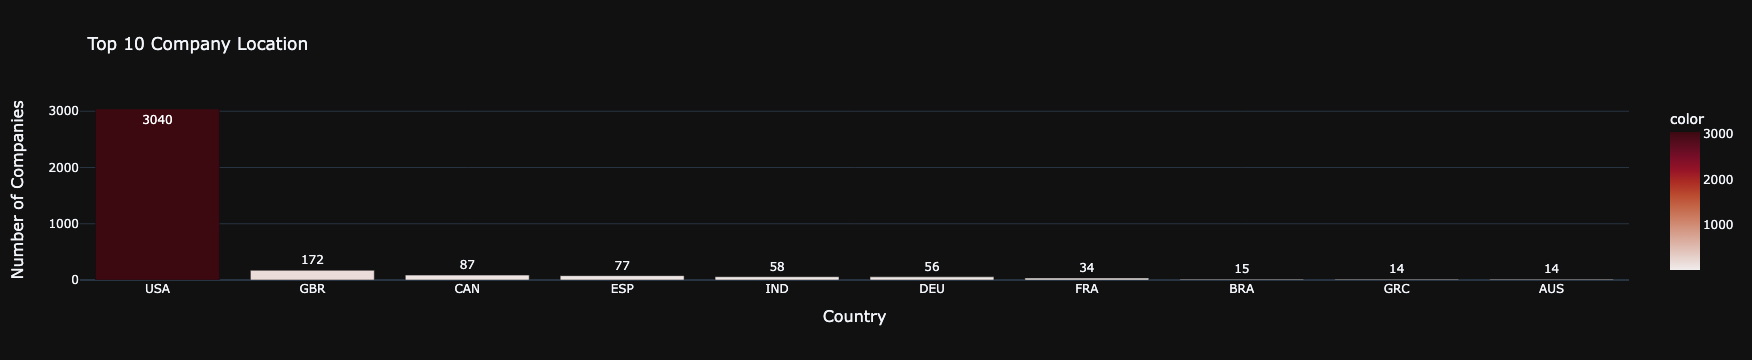

In [128]:
top10_company_location = df_salaries['company_location'].value_counts()[:10]
fig = px.bar(df, 
            x=top10_company_location.index, 
            y=top10_company_location.values,
            text=top10_company_location.values,
            color=top10_company_location.values,
            color_continuous_scale=px.colors.sequential.amp,
            title='Top 10 Company Location')
fig.update_layout(
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Number of Companies',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=12
)
fig.show()

## Company Size

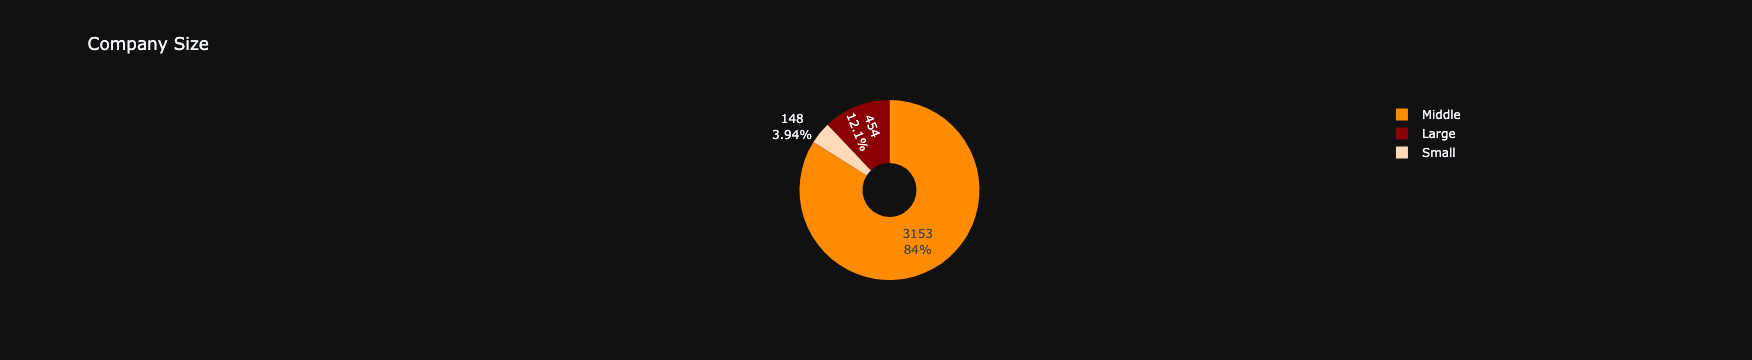

In [129]:
company_size_counts = df_salaries['company_size'].value_counts()
colors=['darkorange', 'darkred', 'peachpuff']

fig = go.Figure(data=[go.Pie(labels=['Middle', 'Large', 'Small'],
                             values=company_size_counts.values,
                             hole=.3,
                             textinfo='percent+value',
                             marker_colors=colors)])
fig.update_layout(
    title_text='Company Size',
    template='plotly_dark'
)
fig.show()

## Work Year and Salary

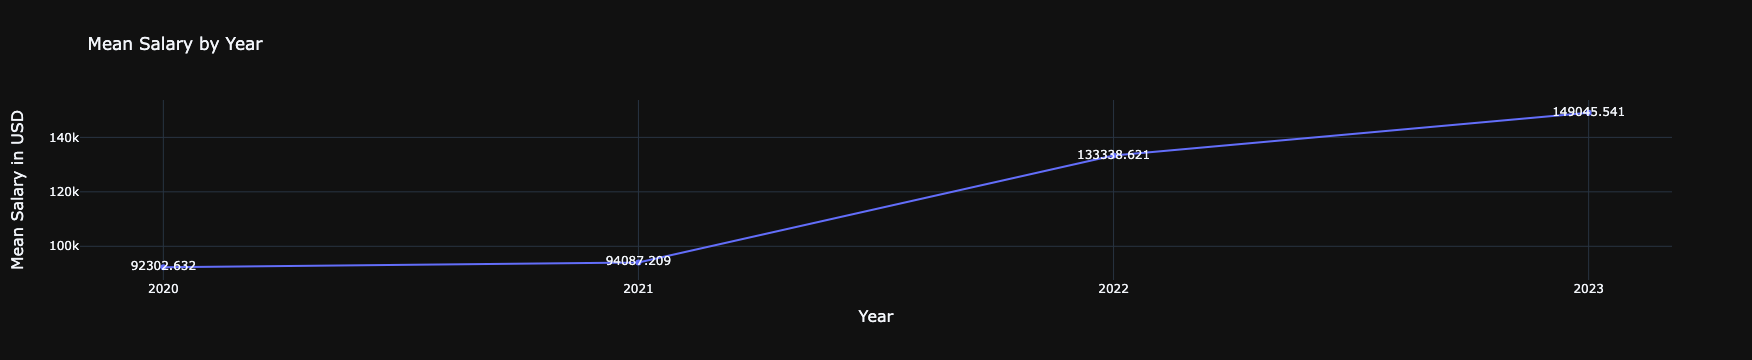

In [130]:
salary_by_year = df_salaries.groupby('work_year')['salary_in_usd'].mean()

fig = px.line(df,
            x=salary_by_year.index.astype('str'),
            y=salary_by_year.values,
            text=np.round(salary_by_year.values,3),
            title='Mean Salary by Year')
fig.update_layout(
    xaxis=dict(
        title='Year',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

## Salary by Experience

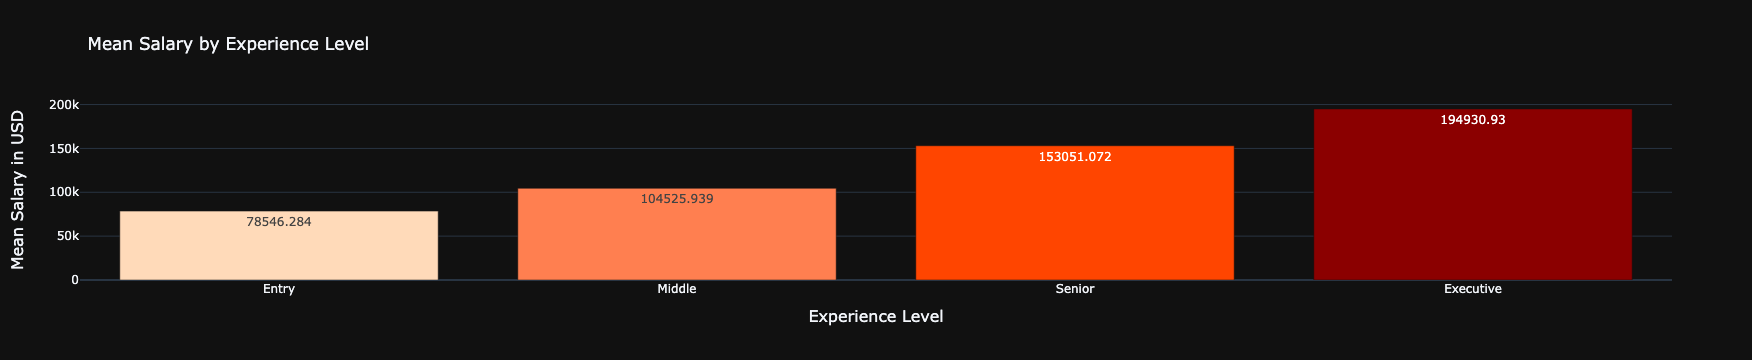

In [131]:
salary_by_experience = df_salaries.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=True)

colors=['peachpuff', 'coral', 'orangered', 'darkred']

fig = go.Figure(data=[go.Bar(
    x=['Entry', 'Middle', 'Senior', 'Executive'],
    y=salary_by_experience.values,
    text=np.round(salary_by_experience.values, 3),
    marker_color=colors
)])
fig.update_layout(
    title_text='Mean Salary by Experience Level',
    xaxis=dict(
        title='Experience Level',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

## Employment Type and Salary

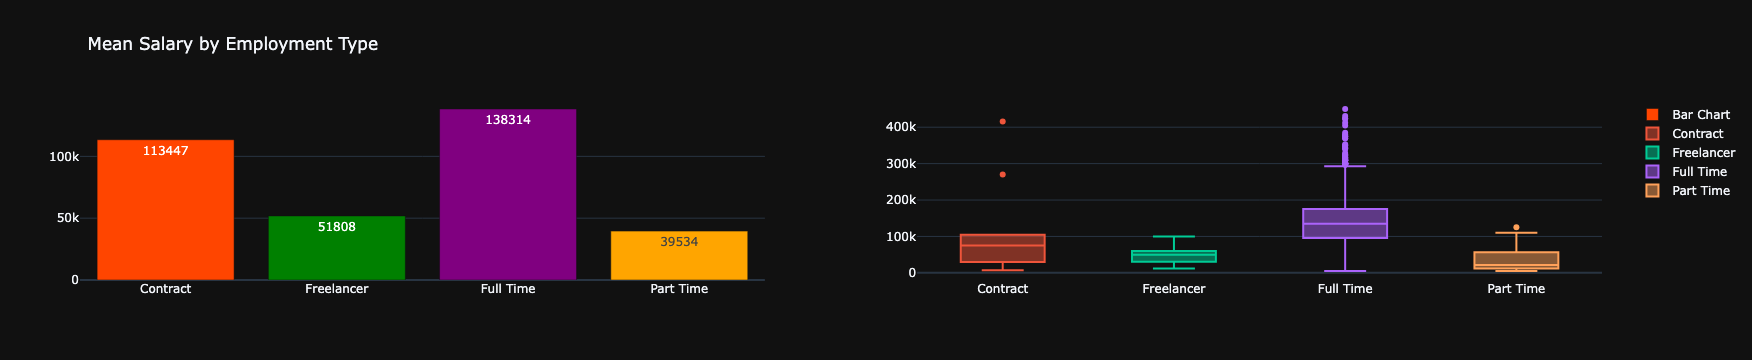

In [132]:
fig = make_subplots(rows=1, cols=2)

salary_by_type = df_salaries.groupby('employment_type')['salary_in_usd'].mean()
salary_by_CT = df_salaries.loc[df['employment_type']=='CT']
salary_by_FL = df_salaries.loc[df['employment_type']=='FL']
salary_by_FT = df_salaries.loc[df['employment_type']=='FT']
salary_by_PT = df_salaries.loc[df['employment_type']=='PT']

colors=['orangered', 'green', 'purple', 'orange']

fig.add_trace(
    go.Bar(
        x=['Contract', 'Freelancer', 'Full Time', 'Part Time'], 
        y=salary_by_type.values, 
        name='Bar Chart',
        text=np.round(salary_by_type.values),
        marker_color=colors),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=salary_by_CT['salary_in_usd'], name='Contract'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=salary_by_FL['salary_in_usd'], name='Freelancer'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=salary_by_FT['salary_in_usd'], name='Full Time'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=salary_by_PT['salary_in_usd'], name='Part Time'),
    row=1, col=2
)

fig.update_layout( 
    title_text="Mean Salary by Employment Type",
    template='plotly_dark')
fig.show()

## Salary by Job Title

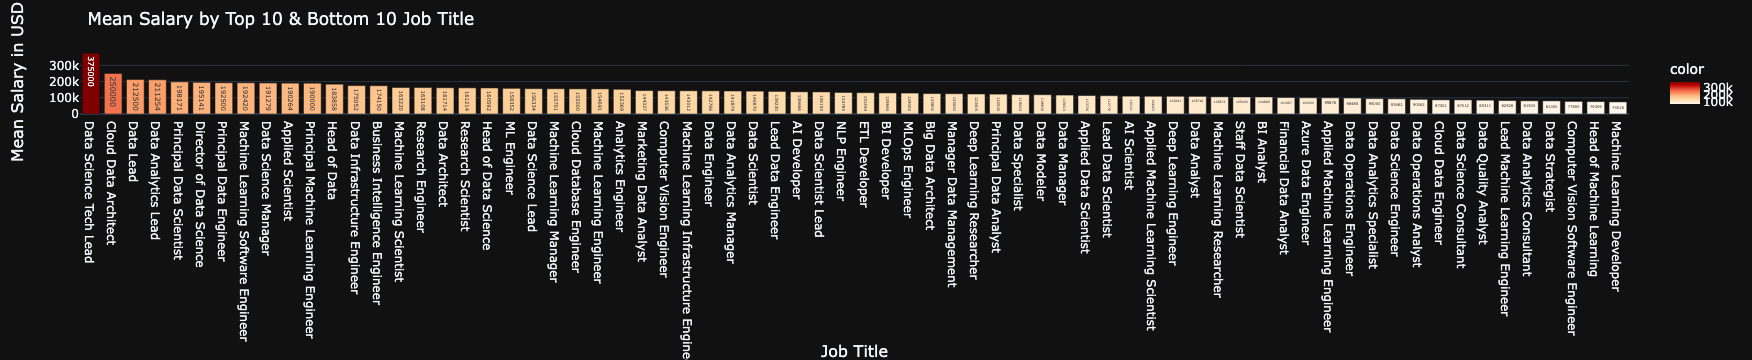

In [162]:
salary_by_title = df_salaries.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[:70]
#low10_salary_by_title = df_salaries.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[-10:]
#salary_by_title = pd.concat([top10_salary_by_title, low10_salary_by_title])

fig = px.bar(
    df,
    x=salary_by_title.index,
    y=salary_by_title.values,
    color=salary_by_title.values,
    color_continuous_scale='OrRd',
    text=np.round(salary_by_title.values)
)
fig.update_layout(
    title_text='Mean Salary by Top 10 & Bottom 10 Job Title',
    xaxis=dict(
        title='Job Title',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)

fig.update_traces(
    textfont_size=8
)

fig.show()

In [134]:
titles = salary_by_title.index.tolist()
salary_by_title_df = df_salaries.loc[df.apply(lambda x: x.job_title in titles, axis=1)]

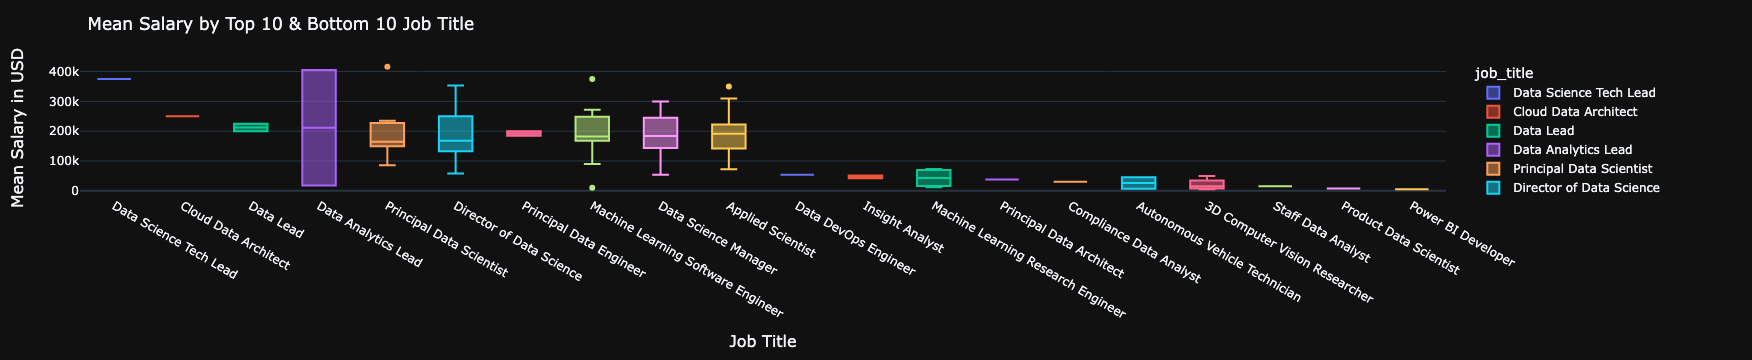

In [135]:
fig = px.box(salary_by_title_df, 
             x='job_title', 
             y='salary_in_usd', 
             color='job_title',
             category_orders={'job_title': titles})

fig.update_layout(
    title_text='Mean Salary by Top 10 & Bottom 10 Job Title',
    xaxis=dict(
        title='Job Title',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

In [143]:
def process_job_title(df_salaries):
    i = 0
    for job_title in df_salaries["job_title"]:
        if ('Scientist' in job_title):
            df_salaries.at[i, 'job_title_classified'] = "Scientist"   
        elif ('Engineer' in job_title):
            df_salaries.at[i, 'job_title_classified'] = 'Data Engineer'
        elif ('Analyst' in job_title or 'Strategist' in job_title):
            df_salaries.at[i, 'job_title_classified'] = 'Data Analyst'
        elif ('Manager' in job_title):
            df_salaries.at[i, 'job_title_classified'] = 'Data Manager'
        elif ('Developer' in job_title or 'Programmer' in job_title or 'Technician' in job_title):
            df_salaries.at[i, 'job_title_classified'] = 'Developer'
        elif ('Architect' in job_title):
            df_salaries.at[i, 'job_title_classified'] = 'Data Architect'
        elif ('Head' in job_title or 'Lead' in job_title or 'Director' in job_title):
            df_salaries.at[i, 'job_title_classified'] = 'Data Lead'
        elif ('Researcher' in job_title):
            df_salaries.at[i, 'job_title_classified'] = 'Data Researcher'
        elif ('Consultant' in job_title):
            df_salaries.at[i, 'job_title_classified'] = 'Data Consultant'
        elif ('Specialist' in job_title):
            df_salaries.at[i, 'job_title_classified'] = 'Data Specialist'
        i=i+1
    return df_salaries

In [145]:
process_job_title(df_salaries)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_classified
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ESP,100,ESP,L,Scientist
1,2023,MI,CT,ML Engineer,30000,USD,30000,USA,100,USA,S,Data Engineer
2,2023,MI,CT,ML Engineer,25500,USD,25500,USA,100,USA,S,Data Engineer
3,2023,SE,FT,Data Scientist,175000,USD,175000,CAN,100,CAN,M,Scientist
4,2023,SE,FT,Data Scientist,120000,USD,120000,CAN,100,CAN,M,Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,USA,100,USA,L,Scientist
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,USA,100,USA,L,Scientist
3752,2020,EN,FT,Data Scientist,105000,USD,105000,USA,100,USA,S,Scientist
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,USA,100,USA,L,Data Analyst


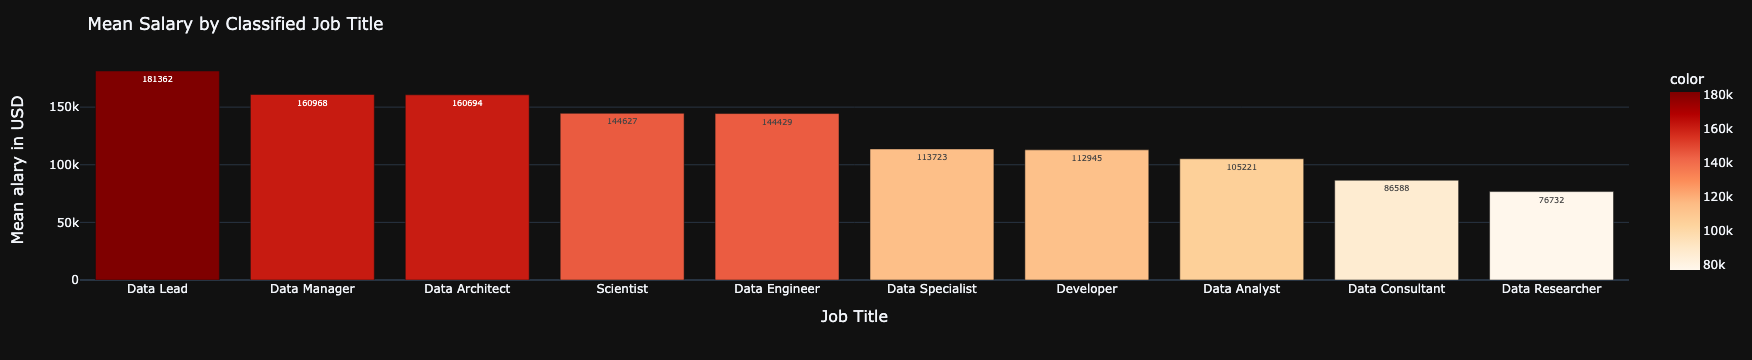

In [155]:
salary_by_title = df_salaries.groupby('job_title_classified')['salary_in_usd'].mean().sort_values(ascending=False)

fig = px.bar(df_salaries,
    x=salary_by_title.index,
    y=salary_by_title.values,
    color=salary_by_title.values,
    color_continuous_scale='OrRd',
    text=np.round(salary_by_title.values)
)
fig.update_layout(
    title_text='Mean Salary by Classified Job Title',
    xaxis=dict(
        title='Job Title',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean alary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=8
)
fig.show()

In [158]:
classified_titles = salary_by_title.index.tolist()
salary_by_classified_title_df = df_salaries.loc[df_salaries.apply(lambda x: x.job_title_classified in classified_titles, axis=1)]

In [159]:
classified_titles

['Data Lead',
 'Data Manager',
 'Data Architect',
 'Scientist',
 'Data Engineer',
 'Data Specialist',
 'Developer',
 'Data Analyst',
 'Data Consultant',
 'Data Researcher']

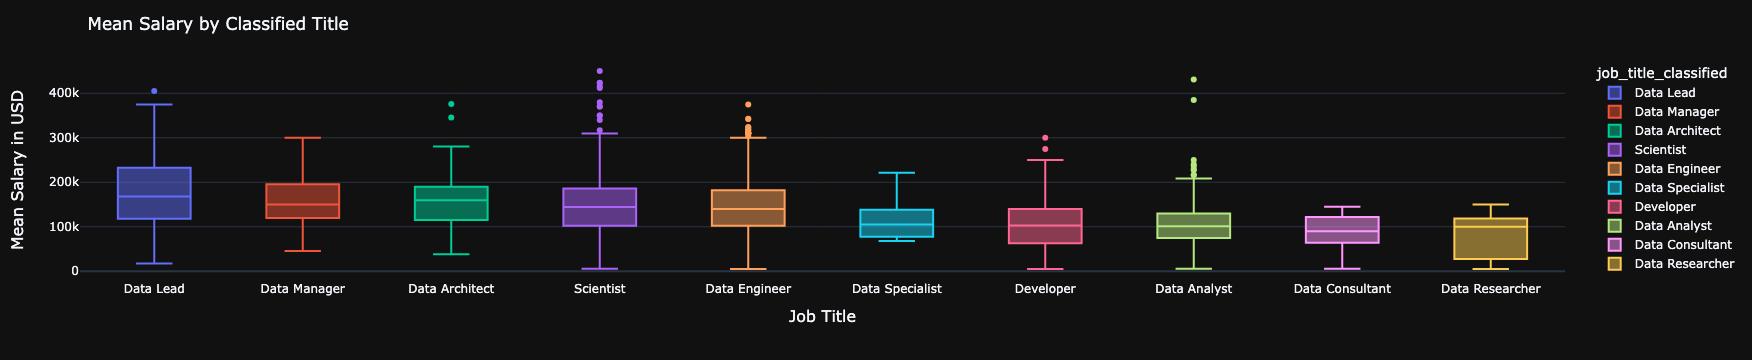

In [161]:
fig = px.box(salary_by_classified_title_df, 
             x='job_title_classified', 
             y='salary_in_usd', 
             color='job_title_classified',
             category_orders={'job_title_classified': classified_titles})

fig.update_layout(
    title_text='Mean Salary by Classified Title',
    xaxis=dict(
        title='Job Title',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

## Employee Residence by Mean Salary

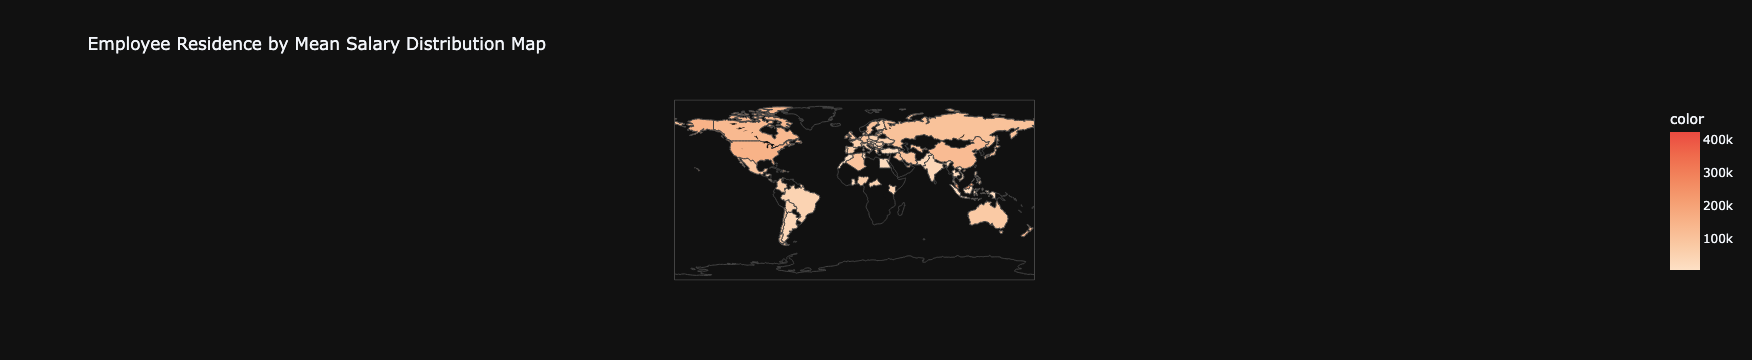

In [163]:
residence_by_salary = df_salaries.groupby('employee_residence')['salary_in_usd'].mean()
fig = px.choropleth(locations=residence_by_salary.index,
                    color=residence_by_salary.values,
                    color_continuous_scale=px.colors.sequential.Peach,
                    template='plotly_dark',
                    title='Employee Residence by Mean Salary Distribution Map')

fig.show()

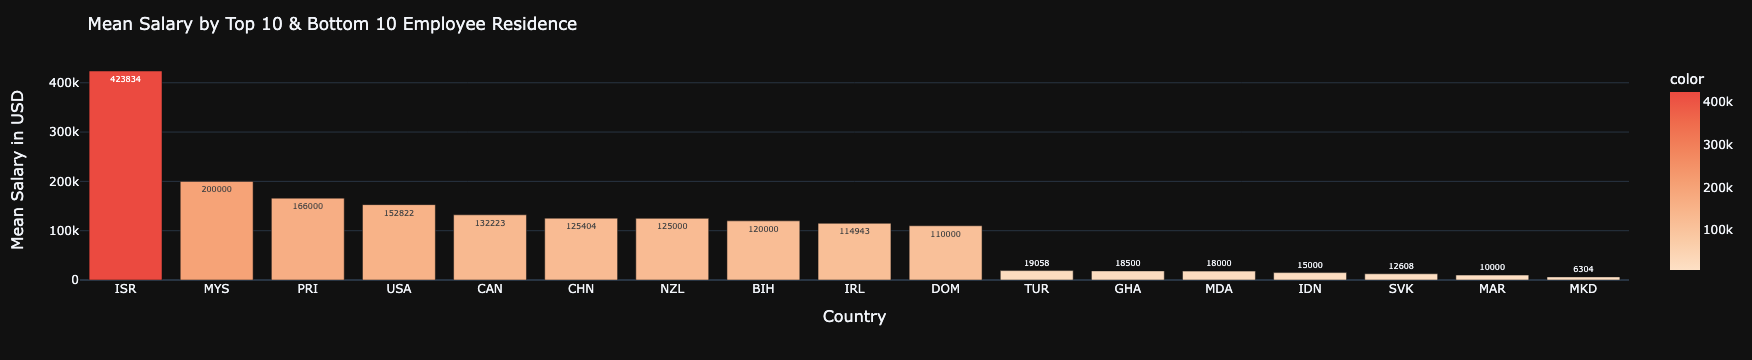

In [169]:
top10_salary_by_residence = df_salaries.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
low10_salary_by_residence = df_salaries.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)[-7:]
salary_by_residence = pd.concat([top10_salary_by_residence, low10_salary_by_residence])

fig = px.bar(df,
    x=salary_by_residence.index,
    y=salary_by_residence.values,
    color=salary_by_residence.values,
    color_continuous_scale='Peach',
    text=np.round(salary_by_residence.values)
)
fig.update_layout(
    title_text='Mean Salary by Top 10 & Bottom 10 Employee Residence',
    xaxis=dict(
        title='Country',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.update_traces(
    textfont_size=8
)
fig.show()

In [171]:
df_salaries['employee_residence'] = coco.convert(names=df['employee_residence'], to='ISO2')
df_salaries['residence_continent'] = df_salaries['employee_residence'].apply(lambda x: pc.country_alpha2_to_continent_code(x))

In [172]:
df_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_classified,residence_continent
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ESP,L,Scientist,EU
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,USA,S,Data Engineer,NA
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,USA,S,Data Engineer,NA
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CAN,M,Scientist,NA
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CAN,M,Scientist,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,USA,L,Scientist,NA
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,USA,L,Scientist,NA
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,USA,S,Scientist,NA
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,USA,L,Data Analyst,NA


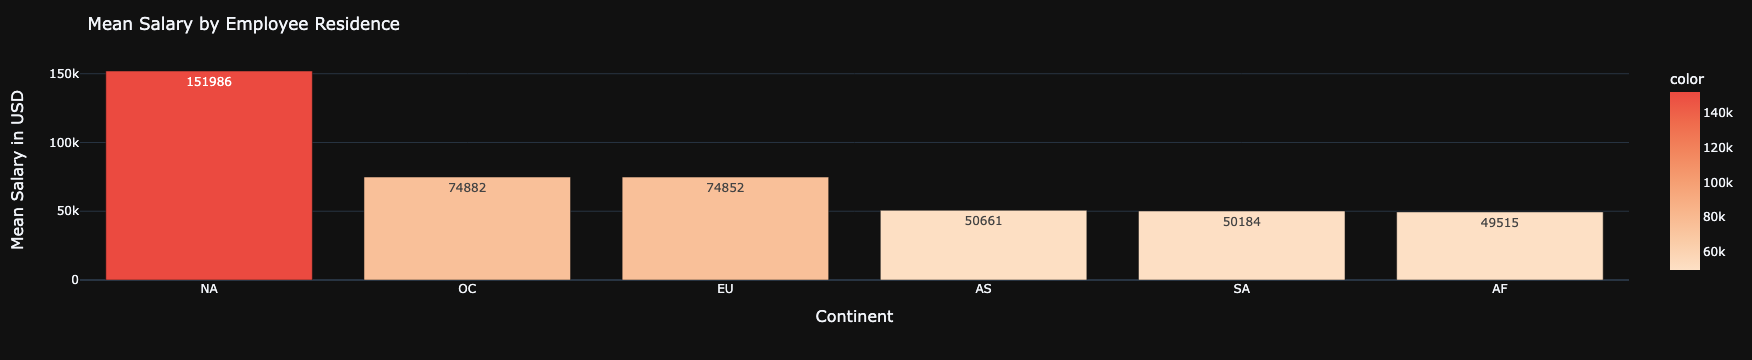

In [173]:
salary_by_residence_continent = df_salaries.groupby('residence_continent')['salary_in_usd'].mean().sort_values(ascending=False)

fig = px.bar(df_salaries,
    x=salary_by_residence_continent.index,
    y=salary_by_residence_continent.values,
    color=salary_by_residence_continent.values,
    color_continuous_scale='Peach',
    text=np.round(salary_by_residence_continent.values)
)
fig.update_layout(
    title_text='Mean Salary by Employee Residence',
    xaxis=dict(
        title='Continent',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

## Remote Ratio and Salary

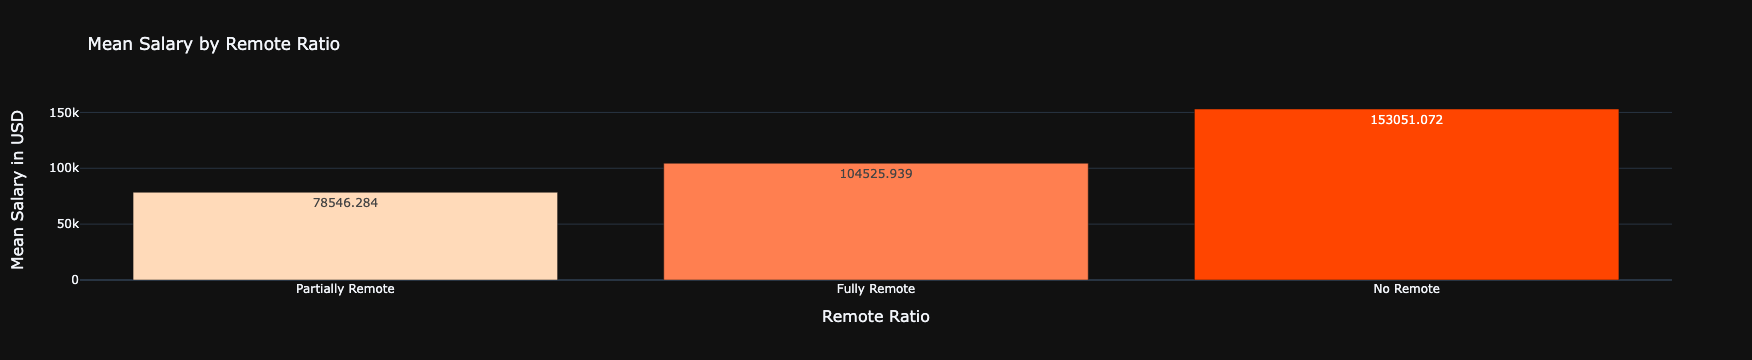

In [174]:
salary_by_remote = df_salaries.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=True)

colors=['peachpuff', 'coral', 'orangered']
fig = go.Figure(data=[go.Bar(
    x=['Partially Remote', 'Fully Remote', 'No Remote'],
    y=salary_by_experience.values,
    marker_color=colors,
    text=np.round(salary_by_experience.values,3)
)])
fig.update_layout(
    title_text='Mean Salary by Remote Ratio',
    xaxis=dict(
        title='Remote Ratio',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Mean Salary in USD',
        titlefont_size=16
    ),
    template='plotly_dark'
)
fig.show()

## Company Size and Salary

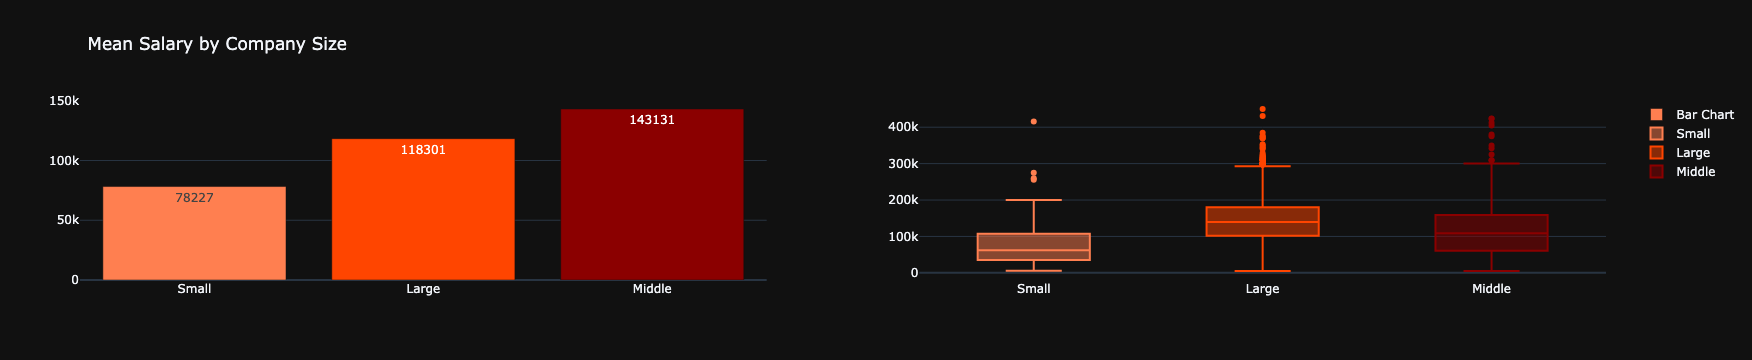

In [175]:
fig = make_subplots(rows=1, cols=2)

salary_by_company_size = df_salaries.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=True)

salary_by_small = df.loc[df_salaries['company_size']=='S']
salary_by_middle = df.loc[df_salaries['company_size']=='M']
salary_by_large = df.loc[df_salaries['company_size']=='L']

colors=['coral', 'orangered', 'darkred']

fig.add_trace(
    go.Bar(
        x=['Small', 'Large', 'Middle'],
        y=salary_by_company_size.values, 
        name='Bar Chart',
        marker_color=colors,
        text=np.round(salary_by_company_size.values)),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=salary_by_small['salary_in_usd'], name='Small', marker_color='coral'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=salary_by_middle['salary_in_usd'], name='Large', marker_color='orangered'),
    row=1, col=2
)

fig.add_trace(
    go.Box(y=salary_by_large['salary_in_usd'], name='Middle', marker_color='darkred'),
    row=1, col=2
)

fig.update_layout(title_text="Mean Salary by Company Size", template='plotly_dark')
fig.show()

# Modeling